In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt 
import matplotlib 
from pylab import *
import numpy as np 
import random

%matplotlib inline

In [13]:
# Número de pares atributos (x) e labels (y)
M = 10000

In [14]:
# Valores de entradas exemplos, features ou atrubutos
x = 10.0*np.random.rand(M,1)

# Valores de saída labels
y = 2.0*x + 10.0*np.random.randn(M,1)


In [15]:
# Gerando valores para os parâmetros
N = 200 
a1 = np.linspace(-30.0, 34.0, N)

In [16]:
# Gerando os ponto para plotar a superfície de eerro 
J = np.zeros(N)
for iter1 in range(0,N):
    yhat = a1[iter1]*x
    J[iter1] = (1/M)*np.sum(np.square(y-yhat))

Text(0.5, 1.0, 'Função de custo da superfície')

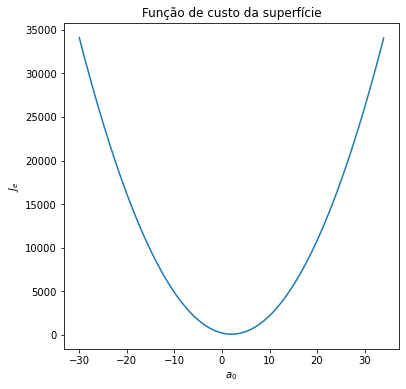

In [17]:
# Plotandoa a superfície de erro 
fig = plt.figure(figsize=(6,6))
plt.plot(a1,J)
plt.xlabel('$a_0$')
plt.ylabel('$J_e$')
plt.title('Função de custo da superfície')

In [18]:
# Solução que minimiza o erro pela equação normal
X = x
a_opt=np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
print(f"O valor ótimo de 'a' encontrado pela equação normal é {a_opt}")

yhat = a_opt[0]*x

Joptimum = (1/M)*np.sum(np.power((y-yhat),2))
print(f"O valor mínimo da função de erro é {Joptimum}")

O valor ótimo de 'a' encontrado pela equação normal é [[2.01003697]]
O valor mínimo da função de erro é 100.99697941795982


In [19]:
# Implementação do gradiente descendente
maxNumIter = 10000
alpha = 0.01

a = np.zeros(maxNumIter)
Jgd = np.zeros(maxNumIter)

a[0] = -30
yhat = a[0]*x

Jgd[0] = (1/M)*np.sum(np.power((y-yhat),2))

error = 1 
iter = 0
while(error>0.001 and iter <maxNumIter-1):
    yhat = a[iter]*X
    update = -(2/M)*np.transpose((y-yhat)).dot(X)
    a_aux = a[iter]-alpha*np.transpose(update)
    a[iter+1] = a_aux[0]
    yhat = a[iter+1]*X
    Jgd[iter+1] = (1/M)*sum(np.power((y-yhat),2))
    error = np.abs(Jgd[iter]-Jgd[iter+1])
    iter = iter+1
    
print(iter)

9


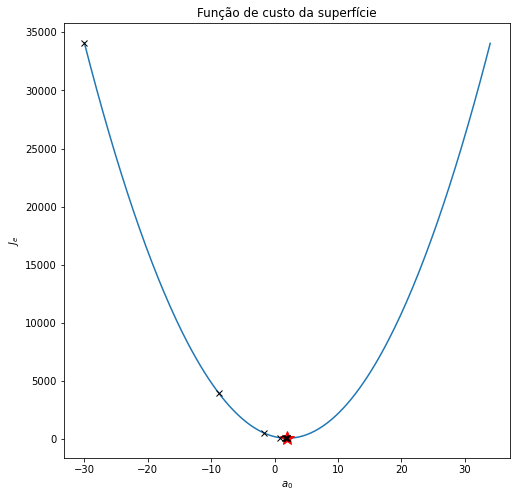

In [20]:
fig = plt.figure(figsize=(8,8))
plt.plot(a1,J)
plt.xlabel('$a_0$')
plt.ylabel('$J_e$')
plt.title('Função de custo da superfície')
plt.plot(a_opt[0], Joptimum, c='r', marker ='*',markersize=14)
plt.plot(a[0:iter], Jgd[0:iter], 'kx')

Text(0.5, 1.0, 'Erro Vs Número de iteração')

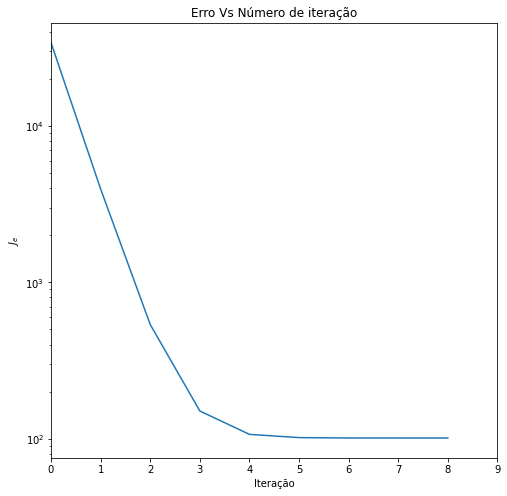

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0,iter),Jgd[0:iter])
plt.xlim(0,iter)
plt.yscale('log')
plt.xlabel('Iteração')
plt.ylabel('$J_e$')
plt.title('Erro Vs Número de iteração')


In [22]:
print(f'a_opt: {a_opt[0][0]}')
print(f'a_gd: {a[iter]}')

a_opt: 2.010036974992845
a_gd: 2.008263641292046
